In [15]:
#Useful Imports
import numpy as np
import matplotlib.pyplot as plt
from sampler import rejection_sampling
from sampler import rejection_sampling_nd
from scipy.stats import multivariate_normal

**1D REJECTION METHOD**

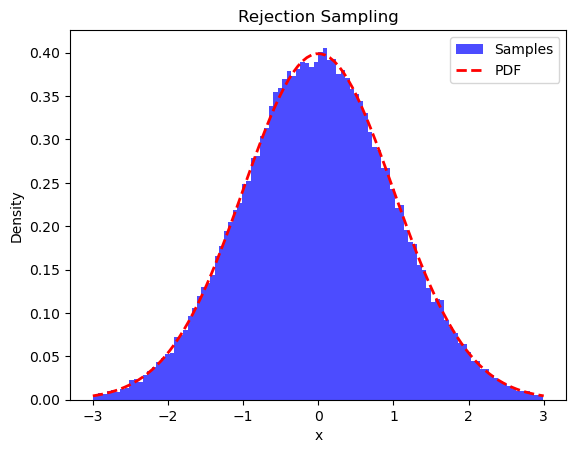

In [16]:
# Generate random numbers using rejection sampling
num_samples = 100000
x_range = (-3, 3)
y_range = (0, 0.4)
samples, efficiency_counter = rejection_sampling(num_samples, x_range, y_range)

#Distribution for comparison
def pdf(x):
    return np.exp(-0.5*x**2) / np.sqrt(2*np.pi)

# Plot histogram of generated numbers compared to the desired PDF
plt.hist(samples, bins=100, density=True, alpha=0.7, color='blue', label='Samples')
x_values = np.linspace(-3, 3, 100)
plt.plot(x_values, pdf(x_values), color='red', linestyle='--', linewidth=2, label='PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Rejection Sampling')
plt.legend()
plt.show()

In [17]:
#Efficiency check
print('Number of wanted samples: ', num_samples)
print('Number of point generated: ', efficiency_counter)
print('Efficiency (%): ', num_samples/efficiency_counter*100)

Number of wanted samples:  100000
Number of point generated:  240449
Efficiency (%):  41.58886083951274


**nD REJECTION METHOD**

In [18]:
# Example target distribution in n dimensions
def Gaussian_nd(*args):
    return np.exp(-0.5 * np.sum(np.square(args))) / ((2 * np.pi) ** (len(args) / 2))

In [19]:
# Define the number of dimensions and ranges for each dimension
n = 2  # Number of dimensions
ranges = np.array([[-3, 3] for _ in range(n)])  # Ranges for each dimension setted equal with this sintax to keep in mind


In [20]:
# Generate random numbers using rejection sampling in n dimensions
num_samples = 100000
samples_nd, efficiency_counter = rejection_sampling_nd(num_samples, n, ranges, Gaussian_nd)

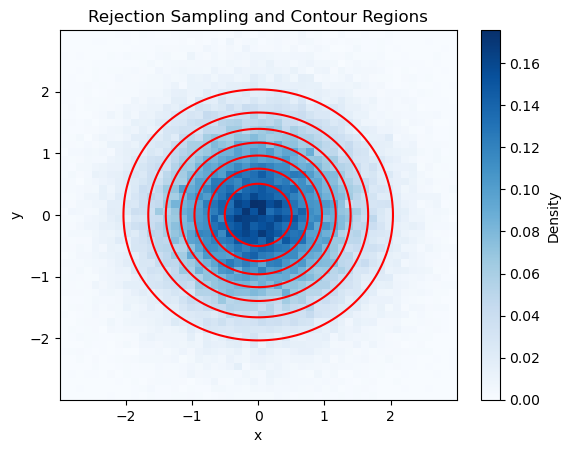

In [21]:
# Plot histogram of the first two dimensions
plt.hist2d(samples_nd[:, 0], samples_nd[:, 1], bins=50, cmap='Blues', density=True)
plt.colorbar(label='Density')

# Plot contours of the target distribution
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = multivariate_normal.pdf(np.dstack((X, Y)), mean=np.zeros(2), cov=np.eye(2))
plt.contour(X, Y, Z, colors='red', linestyles='-')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Rejection Sampling and Contour Regions')
plt.show()

In [22]:
#Efficiency check
print('Number of wanted samples: ', num_samples)
print('Number of point generated: ', efficiency_counter)
print('Efficiency (%): ', num_samples/efficiency_counter*100)

Number of wanted samples:  100000
Number of point generated:  3624381
Efficiency (%):  2.7590918283701407


IMPRESSIVE LOST OF EFFICIENCY!! FROM 41% TO 2% WITH JUST ONE DIMENSION!!